In [10]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-09 00:00:00+09:00,26176.609375,26547.609375,26090.839844,26119.519531,308900000,0.0,0.0
2023-01-16 00:00:00+09:00,25836.669922,26816.679688,25748.099609,26553.529297,362300000,0.0,0.0
2023-01-23 00:00:00+09:00,26880.210938,27502.150391,26788.759766,27382.560547,329200000,0.0,0.0
2023-01-30 00:00:00+09:00,27384.769531,27612.570312,27302.220703,27509.460938,372200000,0.0,0.0
2023-02-06 00:00:00+09:00,27764.660156,27821.220703,27424.689453,27670.980469,382200000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-09 00:00:00+09:00,39332.550781,40091.550781,38972.781250,39470.441406,574200000,0.0,0.0
2024-12-16 00:00:00+09:00,39551.218750,39796.218750,38355.519531,38701.898438,667600000,0.0,0.0
2024-12-23 00:00:00+09:00,39040.718750,40398.230469,38847.128906,40281.160156,626400000,0.0,0.0


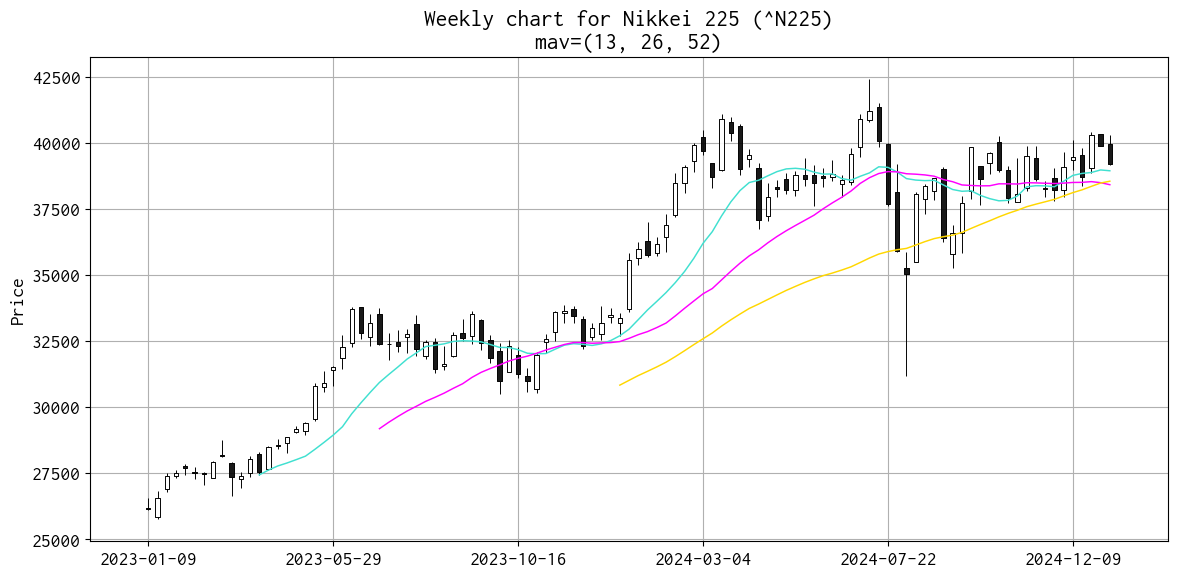

In [11]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 14

fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='default',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' %(ticker.info['longName'], symbol))
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_n225.png')
plt.show()

In [12]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-30 00:00:00+09:00,40325.781250,40325.781250,39864.460938,39894.539062,110600000,0.0,0.0
2025-01-06 00:00:00+09:00,39945.421875,40288.800781,39166.050781,39190.398438,500700000,0.0,0.0


In [13]:
df.tail(2)['Close']

Date
2024-12-30 00:00:00+09:00    39894.539062
2025-01-06 00:00:00+09:00    39190.398438
Name: Close, dtype: float64

In [14]:
df.tail(2)['Close'].diff()

Date
2024-12-30 00:00:00+09:00           NaN
2025-01-06 00:00:00+09:00   -704.140625
Name: Close, dtype: float64

In [15]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-01-06 00:00:00+09:00   -755.023438
dtype: float64

In [16]:
df['Close'].rolling(13).mean()

Date
2023-01-09 00:00:00+09:00             NaN
2023-01-16 00:00:00+09:00             NaN
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
                                 ...     
2024-12-09 00:00:00+09:00    38764.693209
2024-12-16 00:00:00+09:00    38839.923077
2024-12-23 00:00:00+09:00    38874.661659
2024-12-30 00:00:00+09:00    38971.501502
2025-01-06 00:00:00+09:00    38939.547476
Name: Close, Length: 105, dtype: float64

In [17]:
df['Close'].rolling(26).mean()

Date
2023-01-09 00:00:00+09:00             NaN
2023-01-16 00:00:00+09:00             NaN
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
                                 ...     
2024-12-09 00:00:00+09:00    38497.593450
2024-12-16 00:00:00+09:00    38501.648438
2024-12-23 00:00:00+09:00    38528.497746
2024-12-30 00:00:00+09:00    38489.350361
2025-01-06 00:00:00+09:00    38412.416466
Name: Close, Length: 105, dtype: float64

In [18]:
df['Close'].rolling(52).mean()

Date
2023-01-09 00:00:00+09:00             NaN
2023-01-16 00:00:00+09:00             NaN
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
                                 ...     
2024-12-09 00:00:00+09:00    38112.499099
2024-12-16 00:00:00+09:00    38218.900015
2024-12-23 00:00:00+09:00    38349.995944
2024-12-30 00:00:00+09:00    38475.325120
2025-01-06 00:00:00+09:00    38544.811448
Name: Close, Length: 105, dtype: float64